In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import euclidean_distances
import mysql.connector
import mlflow
import mlflow.sklearn
from datetime import datetime
from scipy.spatial.distance import euclidean
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [2]:
# Load the uploaded CSV file

df=pd.read_csv("telcom_data (2).xlsx - Sheet1.csv")

In [3]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,4/4/19 12:01,770.0,4/25/19 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,4/9/19 13:04,235.0,4/25/19 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,4/9/19 17:42,1.0,4/25/19 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,4/10/19 0:31,486.0,4/25/19 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,4/12/19 20:10,565.0,4/25/19 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,4/29/19 7:28,451.0,4/30/19 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,4/29/19 7:28,483.0,4/30/19 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,4/29/19 7:28,283.0,4/30/19 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,4/29/19 7:28,696.0,4/30/19 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [4]:
# Step 1: Drop rows where 'Handset Manufacturer' or 'Handset Type' is missing (since they're essential for this analysis)
df_cleaned = df.dropna(subset=['Handset Manufacturer', 'Handset Type'])

# Top 10 handsets used by customers
top_10_handsets = df_cleaned['Handset Type'].value_counts().head(10)

# Top 3 handset manufacturers
top_3_manufacturers = df_cleaned['Handset Manufacturer'].value_counts().head(3)

# Top 5 handsets per top 3 manufacturers
top_5_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    filtered = df_cleaned[df_cleaned['Handset Manufacturer'] == manufacturer]
    top_5 = filtered['Handset Type'].value_counts().head(5)
    top_5_per_manufacturer[manufacturer] = top_5

top_10_handsets, top_3_manufacturers, top_5_per_manufacturer




(Handset Type
 Huawei B528S-23A                19752
 Apple iPhone 6S (A1688)          9419
 Apple iPhone 6 (A1586)           9023
 undefined                        8987
 Apple iPhone 7 (A1778)           6326
 Apple iPhone Se (A1723)          5187
 Apple iPhone 8 (A1905)           4993
 Apple iPhone Xr (A2105)          4568
 Samsung Galaxy S8 (Sm-G950F)     4520
 Apple iPhone X (A1901)           3813
 Name: count, dtype: int64,
 Handset Manufacturer
 Apple      59565
 Samsung    40839
 Huawei     34423
 Name: count, dtype: int64,
 {'Apple': Handset Type
  Apple iPhone 6S (A1688)    9419
  Apple iPhone 6 (A1586)     9023
  Apple iPhone 7 (A1778)     6326
  Apple iPhone Se (A1723)    5187
  Apple iPhone 8 (A1905)     4993
  Name: count, dtype: int64,
  'Samsung': Handset Type
  Samsung Galaxy S8 (Sm-G950F)    4520
  Samsung Galaxy A5 Sm-A520F      3724
  Samsung Galaxy J5 (Sm-J530)     3696
  Samsung Galaxy J3 (Sm-J330)     3484
  Samsung Galaxy S7 (Sm-G930X)    3199
  Name: count, dtype

In [5]:
# First, define the columns required for aggregation
agg_columns = [
    'Bearer Id',                # For counting sessions
    'Dur. (ms)',                # Session duration
    'Total UL (Bytes)',        # Total upload
    'Total DL (Bytes)',        # Total download
    # Application-specific data volumes (UL + DL)
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Select only rows with MSISDN (user identifier)
user_df = df.dropna(subset=['MSISDN/Number'])

# Group by MSISDN (user) and aggregate
user_behavior = user_df.groupby('MSISDN/Number').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    
    social_media_total=('Social Media DL (Bytes)', 'sum'),
    social_media_total_ul=('Social Media UL (Bytes)', 'sum'),

    google_total=('Google DL (Bytes)', 'sum'),
    google_total_ul=('Google UL (Bytes)', 'sum'),

    email_total=('Email DL (Bytes)', 'sum'),
    email_total_ul=('Email UL (Bytes)', 'sum'),

    youtube_total=('Youtube DL (Bytes)', 'sum'),
    youtube_total_ul=('Youtube UL (Bytes)', 'sum'),

    netflix_total=('Netflix DL (Bytes)', 'sum'),
    netflix_total_ul=('Netflix UL (Bytes)', 'sum'),

    gaming_total=('Gaming DL (Bytes)', 'sum'),
    gaming_total_ul=('Gaming UL (Bytes)', 'sum'),

    other_total=('Other DL (Bytes)', 'sum'),
    other_total_ul=('Other UL (Bytes)', 'sum')
)

# Calculate total data usage per application (DL + UL)
user_behavior['total_social_media_bytes'] = user_behavior['social_media_total'] + user_behavior['social_media_total_ul']
user_behavior['total_google_bytes'] = user_behavior['google_total'] + user_behavior['google_total_ul']
user_behavior['total_email_bytes'] = user_behavior['email_total'] + user_behavior['email_total_ul']
user_behavior['total_youtube_bytes'] = user_behavior['youtube_total'] + user_behavior['youtube_total_ul']
user_behavior['total_netflix_bytes'] = user_behavior['netflix_total'] + user_behavior['netflix_total_ul']
user_behavior['total_gaming_bytes'] = user_behavior['gaming_total'] + user_behavior['gaming_total_ul']
user_behavior['total_other_bytes'] = user_behavior['other_total'] + user_behavior['other_total_ul']

user_behavior.reset_index().head()


,MSISDN/Number,number_of_xdr_sessions,total_session_duration,total_upload,total_download,social_media_total,social_media_total_ul,google_total,google_total_ul,email_total,...,gaming_total_ul,other_total,other_total_ul,total_social_media_bytes,total_google_bytes,total_email_bytes,total_youtube_bytes,total_netflix_bytes,total_gaming_bytes,total_other_bytes
0,3.360100e+10,1,116720.0,36053108.0,8.426375e+08,2206504.0,25631.0,3337123.0,1051882.0,837400.0,...,1367528.0,377096990.0,9473882.0,2232135.0,4389005.0,1331362.0,21624548.0,27180981.0,8.124587e+08,386570872.0
1,3.360100e+10,1,181230.0,36104459.0,1.207552e+08,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,...,14714780.0,279557701.0,2152370.0,2660565.0,5334863.0,3307781.0,12432223.0,11221763.0,1.197501e+08,281710071.0
2,3.360100e+10,1,134969.0,39306820.0,5.566597e+08,3148004.0,47619.0,3343483.0,99643.0,2436500.0,...,9759228.0,495086501.0,6607171.0,3195623.0,3443126.0,3205380.0,21333570.0,19353900.0,5.388277e+08,501693672.0
3,3.360101e+10,1,49878.0,20327526.0,4.019932e+08,251469.0,28825.0,5937765.0,3740728.0,2178618.0,...,3051292.0,25248001.0,10031701.0,280294.0,9678493.0,2284670.0,6977321.0,1942092.0,3.911261e+08,35279702.0
4,3.360101e+10,2,37104.0,94280527.0,1.363130e+09,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,...,5816727.0,777643713.0,27160771.0,2912542.0,18499616.0,3305469.0,41533002.0,49201724.0,1.314798e+09,804804484.0


In [6]:
import numpy as np

# Fill all missing values in numeric columns with their respective mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Re-clean the 'user_behavior' DataFrame with no missing values
user_df = df.dropna(subset=['MSISDN/Number'])

# Group by user and aggregate again with the cleaned dataset
user_behavior = user_df.groupby('MSISDN/Number').agg(
    number_of_xdr_sessions=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    
    social_media_total=('Social Media DL (Bytes)', 'sum'),
    social_media_total_ul=('Social Media UL (Bytes)', 'sum'),

    google_total=('Google DL (Bytes)', 'sum'),
    google_total_ul=('Google UL (Bytes)', 'sum'),

    email_total=('Email DL (Bytes)', 'sum'),
    email_total_ul=('Email UL (Bytes)', 'sum'),

    youtube_total=('Youtube DL (Bytes)', 'sum'),
    youtube_total_ul=('Youtube UL (Bytes)', 'sum'),

    netflix_total=('Netflix DL (Bytes)', 'sum'),
    netflix_total_ul=('Netflix UL (Bytes)', 'sum'),

    gaming_total=('Gaming DL (Bytes)', 'sum'),
    gaming_total_ul=('Gaming UL (Bytes)', 'sum'),

    other_total=('Other DL (Bytes)', 'sum'),
    other_total_ul=('Other UL (Bytes)', 'sum')
)

# Calculate total data usage per application
user_behavior['total_social_media_bytes'] = user_behavior['social_media_total'] + user_behavior['social_media_total_ul']
user_behavior['total_google_bytes'] = user_behavior['google_total'] + user_behavior['google_total_ul']
user_behavior['total_email_bytes'] = user_behavior['email_total'] + user_behavior['email_total_ul']
user_behavior['total_youtube_bytes'] = user_behavior['youtube_total'] + user_behavior['youtube_total_ul']
user_behavior['total_netflix_bytes'] = user_behavior['netflix_total'] + user_behavior['netflix_total_ul']
user_behavior['total_gaming_bytes'] = user_behavior['gaming_total'] + user_behavior['gaming_total_ul']
user_behavior['total_other_bytes'] = user_behavior['other_total'] + user_behavior['other_total_ul']

# Compute total data usage
user_behavior['total_data_bytes'] = user_behavior['total_upload'] + user_behavior['total_download']

# Compute basic metrics (mean, median, etc.)
basic_stats = user_behavior.describe().T[['mean', '50%', 'std', 'min', 'max']]
basic_stats.rename(columns={'50%': 'median'}, inplace=True)

basic_stats.head(10)  # Display a sample of the basic metrics



,mean,median,std,min,max
number_of_xdr_sessions,1.403755e+00,1.0,3.355032e+00,1.0,1.066000e+03
total_session_duration,1.468447e+05,102741.0,2.894646e+05,7142.0,7.255100e+07
total_upload,5.772408e+07,46794345.0,1.401591e+08,2866892.0,4.436642e+10
total_download,6.382078e+08,570371256.0,1.559802e+09,8827082.0,4.873783e+11
social_media_total,2.520191e+06,2265021.0,6.213715e+06,12.0,1.937715e+09
social_media_total_ul,4.622344e+04,41560.0,1.156359e+05,0.0,3.610230e+07
google_total,8.072645e+06,7256793.0,1.933071e+07,207.0,6.007942e+09
google_total_ul,2.886880e+06,2593341.0,7.182177e+06,3.0,2.240634e+09
email_total,2.515148e+06,2266287.0,6.118615e+06,97.0,1.904048e+09
email_total_ul,6.560776e+05,587301.0,1.593606e+06,14.0,4.958324e+08


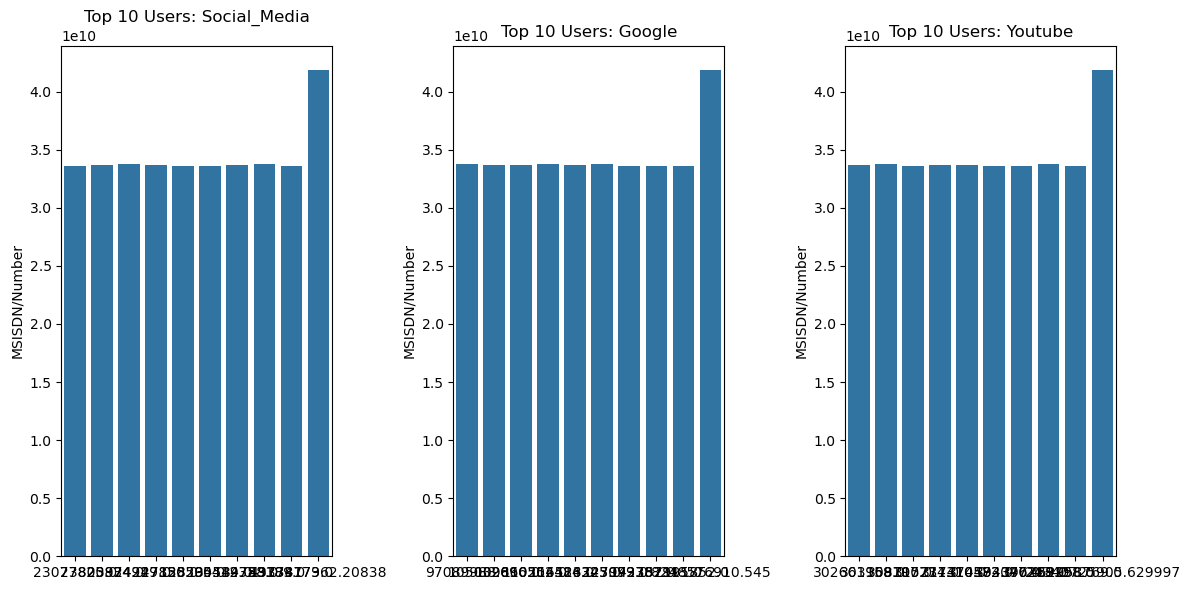

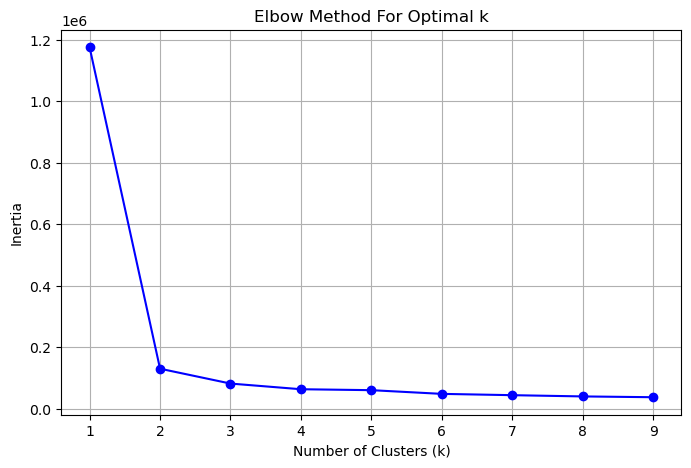

In [7]:
# Step 1: Reuse the aggregated `user_behavior` DataFrame
# (Ensure you’ve already run the aggregation logic from previous steps)

# Engagement metrics to use
engagement_cols = [
    'number_of_xdr_sessions',
    'total_session_duration',
    'total_upload',
    'total_download',
    'total_social_media_bytes',
    'total_google_bytes',
    'total_email_bytes',
    'total_youtube_bytes',
    'total_netflix_bytes',
    'total_gaming_bytes',
    'total_other_bytes'
]

# Step 2: Top 10 customers per engagement metric
top_10_users = {metric: user_behavior[metric].sort_values(ascending=False).head(10) for metric in engagement_cols}

# Step 3: Normalize engagement metrics
scaler = StandardScaler()
normalized_data = scaler.fit_transform(user_behavior[engagement_cols])

# Step 4: KMeans clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
user_behavior['cluster_k3'] = kmeans.fit_predict(normalized_data)

# Step 5: Compute cluster-level summary stats
cluster_stats = user_behavior.groupby('cluster_k3')[engagement_cols].agg(['min', 'max', 'mean', 'sum'])

# Step 6: Top 10 most engaged users per application
top_users_per_app = {
    app: user_behavior[app].sort_values(ascending=False).head(10)
    for app in ['total_social_media_bytes', 'total_google_bytes', 'total_youtube_bytes']
}

# Step 7: Visualize top 3 applications
plt.figure(figsize=(12, 6))
for idx, app in enumerate(top_users_per_app.keys(), 1):
    plt.subplot(1, 3, idx)
    sns.barplot(x=top_users_per_app[app].values, y=top_users_per_app[app].index)
    plt.title(f"Top 10 Users: {app.replace('_bytes', '').replace('total_', '').title()}")

plt.tight_layout()
plt.show()

# Step 8: Elbow Method for Optimal k
inertia = []
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(normalized_data)
    inertia.append(km.inertia_)

# Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [8]:
# Python Script for Task 3.1 to 3.4

In [9]:
# Step 1: Fill missing values
for col in ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
            'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
            'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
            'Handset Type']:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

# Step 2: Aggregate per customer (MSISDN/Number)
df['Avg TCP Retrans'] = (df['TCP DL Retrans. Vol (Bytes)'] + df['TCP UL Retrans. Vol (Bytes)']) / 2
df['Avg RTT'] = (df['Avg RTT DL (ms)'] + df['Avg RTT UL (ms)']) / 2
df['Avg Throughput'] = (df['Avg Bearer TP DL (kbps)'] + df['Avg Bearer TP UL (kbps)']) / 2

user_exp_metrics = df.groupby('MSISDN/Number').agg({
    'Avg TCP Retrans': 'mean',
    'Avg RTT': 'mean',
    'Avg Throughput': 'mean',
    'Handset Type': lambda x: x.mode()[0]  # Most common handset type per user
}).reset_index()


In [10]:
# Task 3.2 – Top, Bottom, and Most Frequent Values

In [11]:
# Function to get top, bottom, most frequent
def get_distribution_info(series, name):
    return {
        f"{name}_top_10": series.sort_values(ascending=False).head(10),
        f"{name}_bottom_10": series.sort_values().head(10),
        f"{name}_most_frequent": series.value_counts().head(10)
    }

tcp_vals = get_distribution_info(df['Avg TCP Retrans'], 'TCP')
rtt_vals = get_distribution_info(df['Avg RTT'], 'RTT')
throughput_vals = get_distribution_info(df['Avg Throughput'], 'Throughput')

In [12]:
# Task 3.3 – Distribution by Handset Type

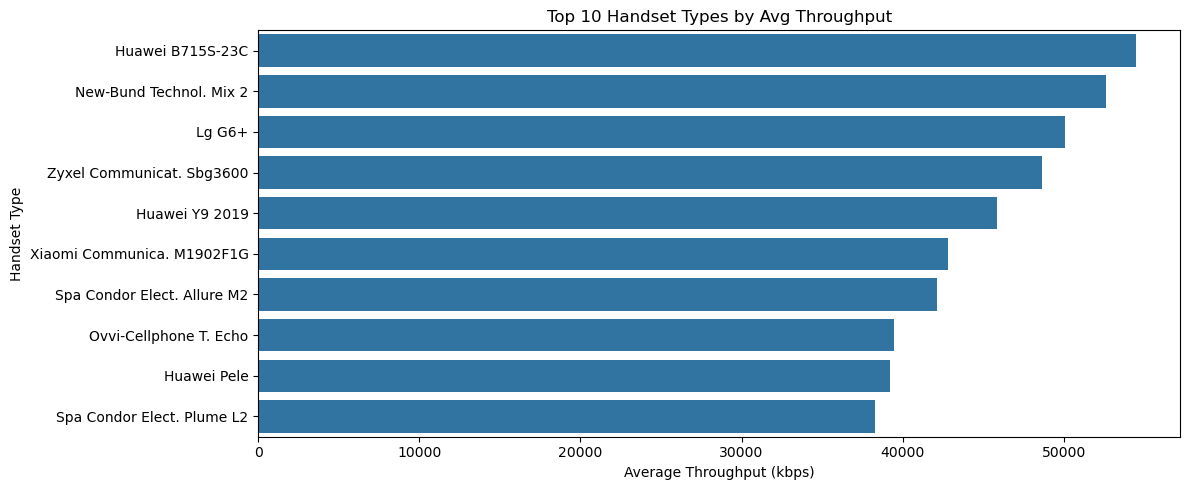

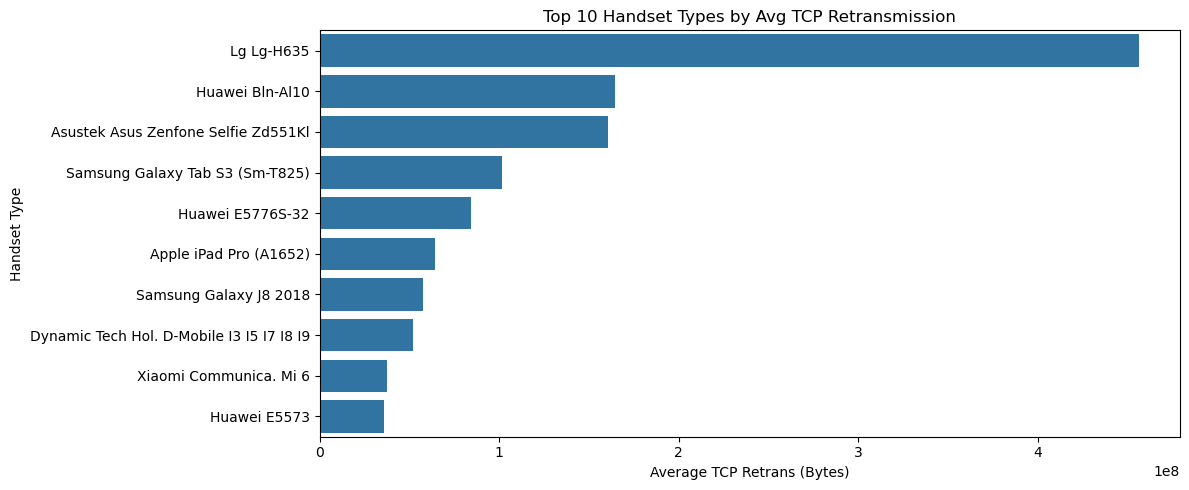

In [13]:
# d. Throughput per handset type
throughput_by_handset = df.groupby('Handset Type')['Avg Throughput'].mean().sort_values(ascending=False)

# e. TCP retransmission per handset type
tcp_by_handset = df.groupby('Handset Type')['Avg TCP Retrans'].mean().sort_values(ascending=False)

# Plot for visualization
plt.figure(figsize=(12, 5))
sns.barplot(x=throughput_by_handset.head(10).values, y=throughput_by_handset.head(10).index)
plt.title('Top 10 Handset Types by Avg Throughput')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Handset Type')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.barplot(x=tcp_by_handset.head(10).values, y=tcp_by_handset.head(10).index)
plt.title('Top 10 Handset Types by Avg TCP Retransmission')
plt.xlabel('Average TCP Retrans (Bytes)')
plt.ylabel('Handset Type')
plt.tight_layout()
plt.show()


In [14]:
!pip install mlflow


In [15]:
import mlflow
print(mlflow.__version__)

3.1.1


In [16]:
!pip install mysql-connector-python

In [17]:
print("user_behavior columns:", user_behavior.columns.tolist())
print("user_exp_metrics columns:", user_exp_metrics.columns.tolist())


user_behavior columns: ['number_of_xdr_sessions', 'total_session_duration', 'total_upload', 'total_download', 'social_media_total', 'social_media_total_ul', 'google_total', 'google_total_ul', 'email_total', 'email_total_ul', 'youtube_total', 'youtube_total_ul', 'netflix_total', 'netflix_total_ul', 'gaming_total', 'gaming_total_ul', 'other_total', 'other_total_ul', 'total_social_media_bytes', 'total_google_bytes', 'total_email_bytes', 'total_youtube_bytes', 'total_netflix_bytes', 'total_gaming_bytes', 'total_other_bytes', 'total_data_bytes', 'cluster_k3']
user_exp_metrics columns: ['MSISDN/Number', 'Avg TCP Retrans', 'Avg RTT', 'Avg Throughput', 'Handset Type']


In [18]:
# Function to compute score
def compute_score_by_cluster(df, user_id, features, cluster_type):
    data = df[[user_id] + features].dropna()
    ids = data[user_id].values
    X = data[features].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    if cluster_type == 'engagement':
        traffic_means = [X_scaled[labels == i][:, -1].mean() for i in range(2)]
        target_cluster = int(np.argmin(traffic_means))
    elif cluster_type == 'experience':
        exp_scores = [X_scaled[labels == i].mean() for i in range(2)]
        target_cluster = int(np.argmax(exp_scores))
    else:
        raise ValueError("Invalid cluster_type")

    distances = [euclidean(x, centroids[target_cluster]) for x in X_scaled]

    return pd.DataFrame({
        user_id: ids,
        f'{cluster_type}_score': distances
    })

# Features for each type
engagement_features = [
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Total UL (Bytes)', 'Total DL (Bytes)'
]

experience_features = [
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'
]

# Compute scores
engagement_df = compute_score_by_cluster(df, 'MSISDN/Number', engagement_features, 'engagement')
experience_df = compute_score_by_cluster(df, 'MSISDN/Number', experience_features, 'experience')

# Merge and show result
score_df = pd.merge(engagement_df, experience_df, on='MSISDN/Number', how='inner')
print(score_df.head(10))


   MSISDN/Number  engagement_score  experience_score
0   3.366496e+10          4.446817         22.422912
1   3.366496e+10          4.446817         22.544750
2   3.368185e+10          4.610508         22.422720
3   3.368185e+10          4.610508         22.422763
4   3.376063e+10          4.612321         22.419929
5   3.375034e+10          4.681144         22.419929
6   3.369980e+10          4.432733         22.419929
7   3.366819e+10          4.662261         22.419929
8   3.366819e+10          4.662261         22.419929
9   3.366819e+10          4.662261         22.419929


In [19]:
# Define scoring function
def compute_score_by_cluster(df, user_id, features, cluster_type):
    data = df[[user_id] + features].dropna()
    ids = data[user_id].values
    X = data[features].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    kmeans = KMeans(n_clusters=2, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    centroids = kmeans.cluster_centers_

    if cluster_type == 'engagement':
        traffic_means = [X_scaled[labels == i][:, -1].mean() for i in range(2)]
        target_cluster = int(np.argmin(traffic_means))
    elif cluster_type == 'experience':
        exp_scores = [X_scaled[labels == i].mean() for i in range(2)]
        target_cluster = int(np.argmax(exp_scores))
    else:
        raise ValueError("Invalid cluster_type")

    distances = [euclidean(x, centroids[target_cluster]) for x in X_scaled]

    return pd.DataFrame({
        user_id: ids,
        f'{cluster_type}_score': distances
    })

# Define features
engagement_features = [
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
    'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Total UL (Bytes)', 'Total DL (Bytes)'
]

experience_features = [
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'
]

# Calculate scores
engagement_df = compute_score_by_cluster(df, 'MSISDN/Number', engagement_features, 'engagement')
experience_df = compute_score_by_cluster(df, 'MSISDN/Number', experience_features, 'experience')

# Merge and compute satisfaction score
score_df = pd.merge(engagement_df, experience_df, on='MSISDN/Number', how='inner')
score_df['satisfaction_score'] = (score_df['engagement_score'] + score_df['experience_score']) / 2

# Top 10 satisfied customers
top_10_satisfied = score_df.sort_values(by='satisfaction_score', ascending=False).head(10)
top_10_satisfied


,MSISDN/Number,engagement_score,experience_score,satisfaction_score
8374,3.366905e+10,7.578063,185.628173,96.603118
514401,3.366905e+10,6.162818,185.628173,95.895495
1234055,3.366905e+10,5.118373,185.628173,95.373273
1348467,3.366905e+10,3.576466,185.628173,94.602319
483796,3.366232e+10,4.560438,174.526631,89.543535
739539,3.365825e+10,6.249112,168.569969,87.409541
512183,3.365825e+10,3.758718,168.569969,86.164344
1330126,3.365825e+10,3.679749,168.569969,86.124859
643720,3.365825e+10,3.539884,168.569969,86.054927
7807,3.365825e+10,3.385343,168.569969,85.977656


In [20]:
# Assume score_df already contains:
# 'MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score'

# Load score_df or ensure it's calculated (if not already present in your session)
# If not: merge engagement + experience scores and compute satisfaction again

# Run KMeans on 2D input: [engagement, experience]
X_cluster = score_df[['engagement_score', 'experience_score']]
kmeans = KMeans(n_clusters=2, random_state=42)
score_df['cluster'] = kmeans.fit_predict(X_cluster)

# Task 4.5: Aggregate averages per cluster
cluster_agg = score_df.groupby('cluster').agg({
    'satisfaction_score': 'mean',
    'experience_score': 'mean'
}).reset_index()

print("✅ Cluster Summary:")
print(cluster_agg)


✅ Cluster Summary:
   cluster  satisfaction_score  experience_score
0        0           53.496449        102.796127
1        1           13.358836         22.531405


In [21]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [22]:
import mysql.connector

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='arun@3540',
    database='telecom_project'
)
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS user_scores (
    user_id VARCHAR(50),
    engagement_score FLOAT,
    experience_score FLOAT,
    satisfaction_score FLOAT
)
''')

user_scores = pd.DataFrame({
    'user_id': ['u1', 'u2', 'u3'],
    'Engagement_Score': [0.85, 0.72, 0.95],
    'Experience_Score': [0.78, 0.67, 0.88],
    'Satisfaction_Score': [0.82, 0.70, 0.92]
})

# Insert data
for user_id, row in user_scores.iterrows():
    cursor.execute('''
        INSERT INTO user_scores (user_id, engagement_score, experience_score, satisfaction_score)
        VALUES (%s, %s, %s, %s)
    ''', (user_id, row['Engagement_Score'], row['Experience_Score'], row['Satisfaction_Score']))

conn.commit()
cursor.execute("SELECT * FROM user_scores LIMIT 5")
for row in cursor.fetchall():
    print(row)
conn.close()



('0', 0.85, 0.78, 0.82)
('1', 0.72, 0.67, 0.7)
('2', 0.95, 0.88, 0.92)
